<a href="https://colab.research.google.com/github/ertgrulyksk/Data-Analysis-Visualization-Machine-Learning-EDA/blob/main/Data_Analysis_Visualization_Machine_Learning_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [7]:
df.shape

(607, 12)

In [8]:
df['salary_currency'].unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [9]:
df.drop(['Unnamed: 0','salary_currency','salary'],axis=1,inplace=True)

In [10]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [11]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [12]:
df['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [13]:
df['company_size']=df['company_size'].map({'L':'Large','M':'Medium','S':'Small'})

In [14]:
df['company_size'].unique()

array(['Large', 'Small', 'Medium'], dtype=object)

In [15]:
df['salary_in_usd'].max()

600000

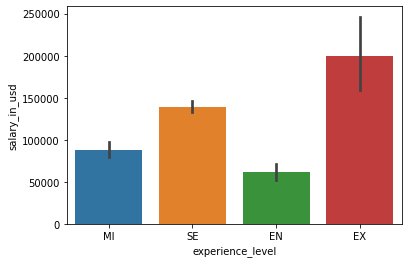

In [16]:
sns.barplot(x='experience_level',y='salary_in_usd',data=df)

In [17]:
df['experience_level']=df['experience_level'].map({'EN':'Entry-level','MI':'Mid-level','SE':'Senior-level','EX':'Executive-level'})

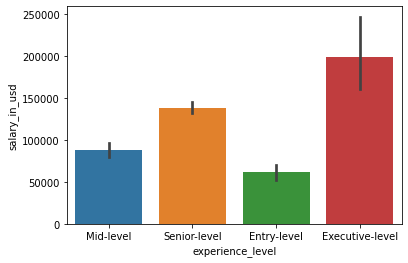

In [18]:
sns.barplot(x='experience_level',y='salary_in_usd',data=df)

In [19]:
jobs_val= df['job_title'].value_counts().values
jobs_count=df['job_title'].value_counts().index

In [20]:
jobs_val

array([143, 132,  97,  41,  16,  12,  11,   8,   8,   7,   7,   7,   7,
         7,   6,   6,   6,   6,   5,   5,   5,   5,   4,   4,   4,   4,
         3,   3,   3,   3,   3,   3,   3,   2,   2,   2,   2,   2,   2,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

([<matplotlib.patches.Wedge at 0x7fba9f6659d0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Data Scientist'),
  Text(-1.096433047659817, 0.08851311766854544, 'Data Engineer'),
  Text(0.02819083681447592, -1.0996387028109278, 'Data Analyst'),
  Text(0.9465291360329781, -0.5604307224275488, 'Machine Learning Engineer'),
  Text(1.092457938694234, -0.12859102684070065, 'Research Scientist')],
 [Text(0.2999999837833699, 0.5196152516333385, "''33.33%''"),
  Text(-0.5980543896326274, 0.04827988236466115, "''30.77%''"),
  Text(0.015376820080623226, -0.5998029288059605, "''22.61%''"),
  Text(0.5162886196543516, -0.30568948496048115, "''9.56%''"),
  Text(0.5958861483786729, -0.07014056009492763, "''3.73%''")])

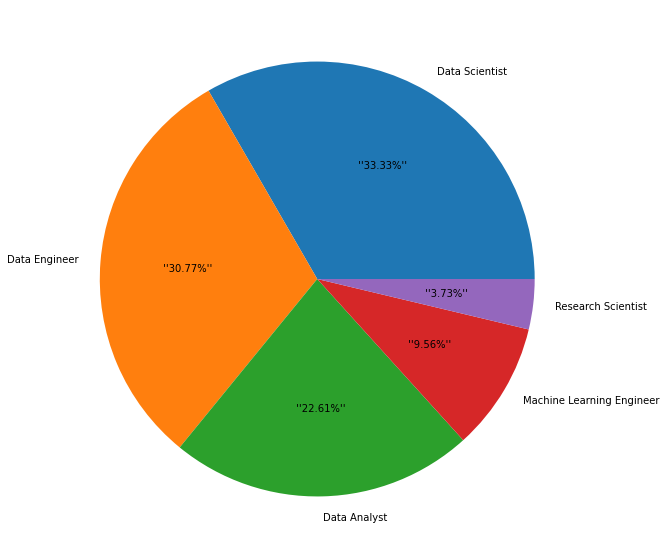

In [21]:
plt.figure(figsize=(10,10))
plt.pie(jobs_val[:5],labels=jobs_count[:5],autopct="''%1.2f%%''")

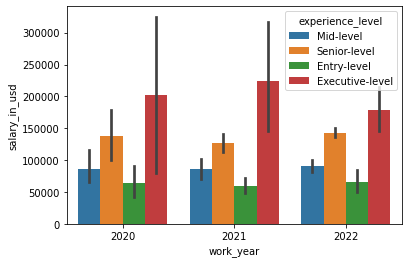

In [22]:
sns.barplot(x='work_year',y='salary_in_usd',hue='experience_level',data=df)

In [23]:
emp_res = df['employee_residence'].value_counts().head(5)

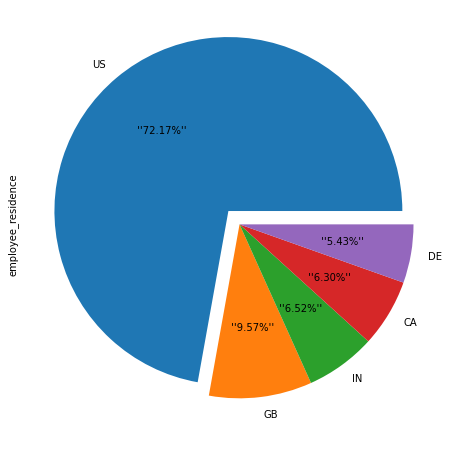

In [24]:
plt.figure(figsize=(8,8))
emp_res.plot(kind='pie',autopct="''%1.2f%%''",explode=(0.1, 0, 0, 0, 0))

In [25]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,FT,Data Scientist,79833,DE,0,DE,Large
1,2020,Senior-level,FT,Machine Learning Scientist,260000,JP,0,JP,Small
2,2020,Senior-level,FT,Big Data Engineer,109024,GB,50,GB,Medium
3,2020,Mid-level,FT,Product Data Analyst,20000,HN,0,HN,Small
4,2020,Senior-level,FT,Machine Learning Engineer,150000,US,50,US,Large
...,...,...,...,...,...,...,...,...,...
602,2022,Senior-level,FT,Data Engineer,154000,US,100,US,Medium
603,2022,Senior-level,FT,Data Engineer,126000,US,100,US,Medium
604,2022,Senior-level,FT,Data Analyst,129000,US,0,US,Medium
605,2022,Senior-level,FT,Data Analyst,150000,US,100,US,Medium


In [26]:
df.rename(columns = { "work_year" : "Work_Year" })

,Work_Year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,FT,Data Scientist,79833,DE,0,DE,Large
1,2020,Senior-level,FT,Machine Learning Scientist,260000,JP,0,JP,Small
2,2020,Senior-level,FT,Big Data Engineer,109024,GB,50,GB,Medium
3,2020,Mid-level,FT,Product Data Analyst,20000,HN,0,HN,Small
4,2020,Senior-level,FT,Machine Learning Engineer,150000,US,50,US,Large
...,...,...,...,...,...,...,...,...,...
602,2022,Senior-level,FT,Data Engineer,154000,US,100,US,Medium
603,2022,Senior-level,FT,Data Engineer,126000,US,100,US,Medium
604,2022,Senior-level,FT,Data Analyst,129000,US,0,US,Medium
605,2022,Senior-level,FT,Data Analyst,150000,US,100,US,Medium


In [27]:
df.groupby('company_location').size().sort_values(ascending=False).head(10)

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
PL      4
dtype: int64

In [28]:
df.shape

(607, 9)

In [29]:
df.size

5463

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [31]:
df.corr()

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


In [32]:
cor = pd.DataFrame(np.tril(df.corr().values), index=df.corr().index, columns=df.corr().columns).round(3)
cor = cor.iloc[:,:-1]
cor.drop(cor.head(1).index, inplace=True) 
cor.replace(to_replace=[0,1], value='', inplace=True)

In [33]:
cor

,work_year,salary_in_usd
salary_in_usd,0.17,
remote_ratio,0.076,0.132


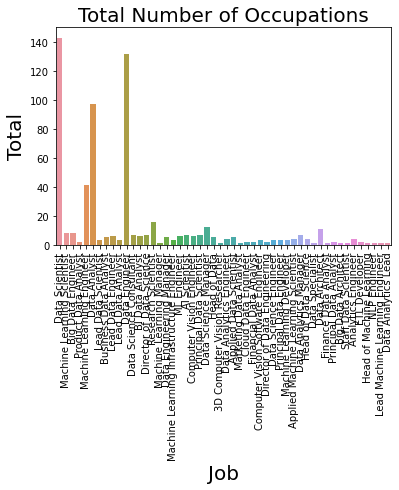

In [34]:
sns.countplot(x='job_title', data=df)
plt.ylabel("Total", size=20)
plt.xlabel('Job', size=20)
plt.xticks(rotation=90)
plt.title("Total Number of Occupations", size=20);

In [35]:
df.rename(columns = { "work_year" : "Work_Year",
                      "experience_level" : "Experience_Level",
                      "employment_type" : "Employment_Type",
                      "job_title" : "Job_Title"})

,Work_Year,Experience_Level,Employment_Type,Job_Title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,FT,Data Scientist,79833,DE,0,DE,Large
1,2020,Senior-level,FT,Machine Learning Scientist,260000,JP,0,JP,Small
2,2020,Senior-level,FT,Big Data Engineer,109024,GB,50,GB,Medium
3,2020,Mid-level,FT,Product Data Analyst,20000,HN,0,HN,Small
4,2020,Senior-level,FT,Machine Learning Engineer,150000,US,50,US,Large
...,...,...,...,...,...,...,...,...,...
602,2022,Senior-level,FT,Data Engineer,154000,US,100,US,Medium
603,2022,Senior-level,FT,Data Engineer,126000,US,100,US,Medium
604,2022,Senior-level,FT,Data Analyst,129000,US,0,US,Medium
605,2022,Senior-level,FT,Data Analyst,150000,US,100,US,Medium


In [36]:
prices=pd.read_csv('prices.csv')

In [37]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [38]:
prices.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [39]:
prices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [40]:
prices1=prices[prices['symbol']=='AMZN']

In [41]:
prices1.head()

,date,symbol,open,close,low,high,volume
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [42]:
prices1.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,337.875664,337.899058,333.969688,341.464438,4.607596e+06
std,189.294231,189.109339,187.654696,190.525796,3.091557e+06
min,105.930000,108.610001,105.800003,111.290001,9.844000e+05
25%,192.962494,193.377506,190.284997,195.532501,2.741550e+06
50%,282.500000,282.915008,279.869995,285.074997,3.890700e+06
75%,398.425003,398.014999,393.799988,402.082496,5.384450e+06
max,845.789978,844.359985,840.599976,847.210022,4.242110e+07


In [43]:
np.round(prices1.median(),2)

open          282.50
close         282.92
low           279.87
high          285.07
volume    3890700.00
dtype: float64

In [44]:
prices1['date']=pd.to_datetime(prices1['date'])

In [45]:
print("Minimum date value : {}".format(prices1['date'].min()))
print("Maximum date value : {}".format(prices1['date'].max()))

Minimum date value : 2010-01-04 00:00:00
Maximum date value : 2016-12-30 00:00:00


Text(0.5, 1.0, 'AMAZON Stock value changes since 2010')

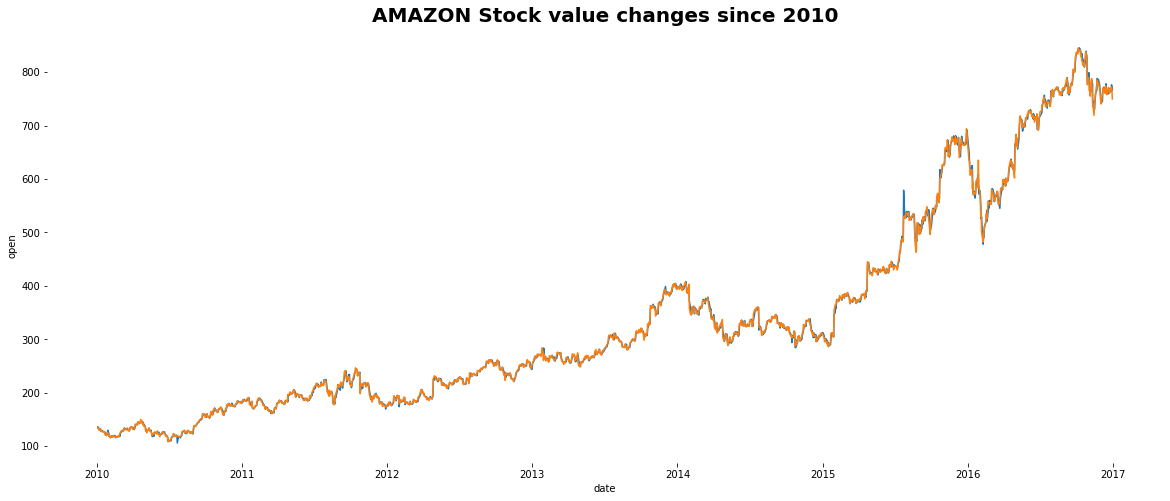

In [71]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=prices1, x='date',y='open')
ax=sns.lineplot(data=prices1, x='date',y='close' );
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("AMAZON Stock value changes since 2010", size=20, weight='bold')

Text(0.5, 1.0, 'Google Stock volume')

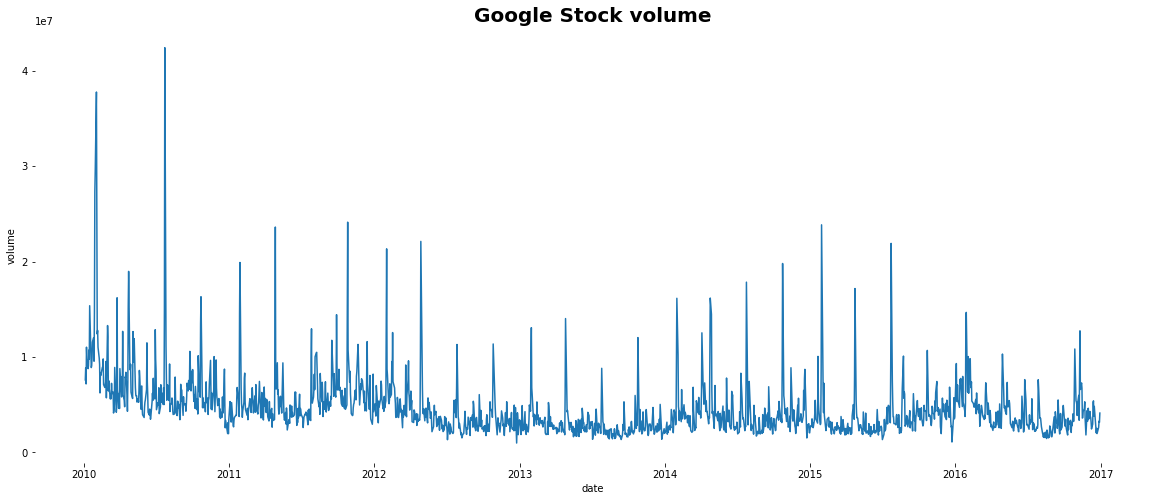

In [48]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=prices1, x='date',y='volume')

for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
plt.title("Google Stock volume", size=20, weight='bold')

In [49]:
prices1.drop(['symbol'], axis=1, inplace=True)

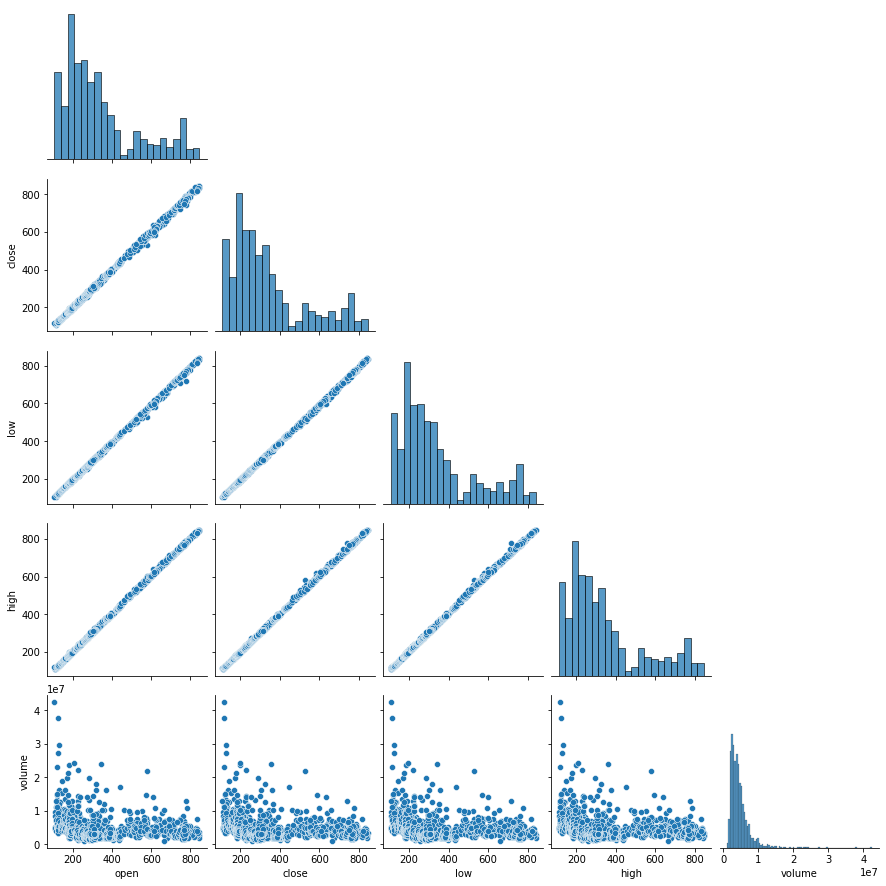

In [50]:
sns.pairplot(prices1,corner=True)

In [51]:
prices1.corr()['close']

open      0.999581
close     1.000000
low       0.999832
high      0.999811
volume   -0.238560
Name: close, dtype: float64

In [53]:
X=prices1[['volume','open']]
y=prices1['close']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [56]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.0 MB/s 
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-ot4p71_c/fbprophet_896ec560bc8344f7bb1fe87f36eda3d2/setup.py'"'"'; __file__='"'"'/tmp/pip-install-ot4p71_c/fbprophet_896ec560bc8344f7bb1fe87f36eda3d2/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.c

In [58]:
from prophet import Prophet

In [59]:
prices = pd.read_csv('prices.csv')

In [60]:
prices.head(3)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0


In [61]:
prices = prices[['date','close']]

In [62]:
prices.head(3)

,date,close
0,2016-01-05 00:00:00,125.839996
1,2016-01-06 00:00:00,119.980003
2,2016-01-07 00:00:00,114.949997


In [63]:
prices.columns = ['ds', 'y']

In [64]:
model = Prophet()
model.fit(prices)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
future = model.make_future_dataframe(periods=600)

In [66]:
tahmin = model.predict(future)

In [67]:
tahmin.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-04,42.376420,-54.327332,164.360561,42.376420,42.376420,4.401693,4.401693,4.401693,4.752007,4.752007,4.752007,-0.350314,-0.350314,-0.350314,0.0,0.0,0.0,46.778113
1,2010-01-04,42.376420,-58.039014,152.811164,42.376420,42.376420,4.401693,4.401693,4.401693,4.752007,4.752007,4.752007,-0.350314,-0.350314,-0.350314,0.0,0.0,0.0,46.778113
2,2010-01-05,42.371868,-61.396072,152.042767,42.371868,42.371868,4.409128,4.409128,4.409128,4.798126,4.798126,4.798126,-0.388998,-0.388998,-0.388998,0.0,0.0,0.0,46.780995


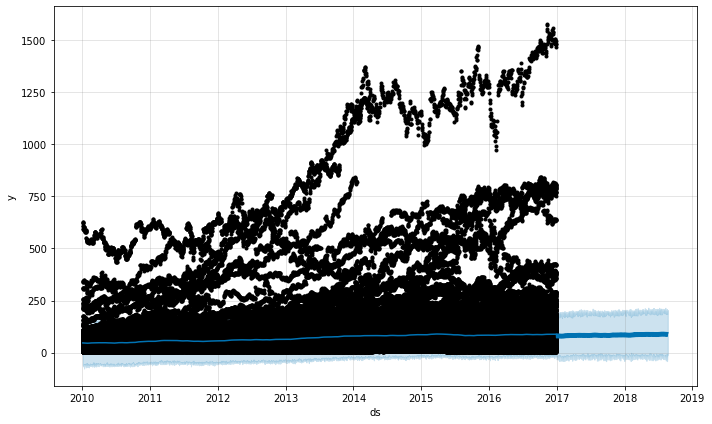

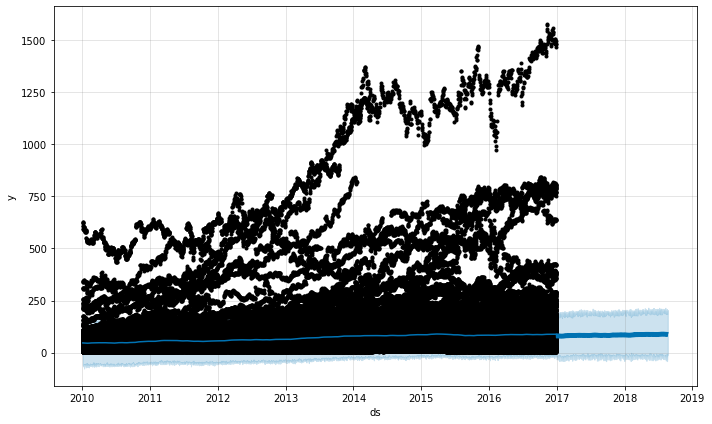

In [68]:
model.plot(tahmin)

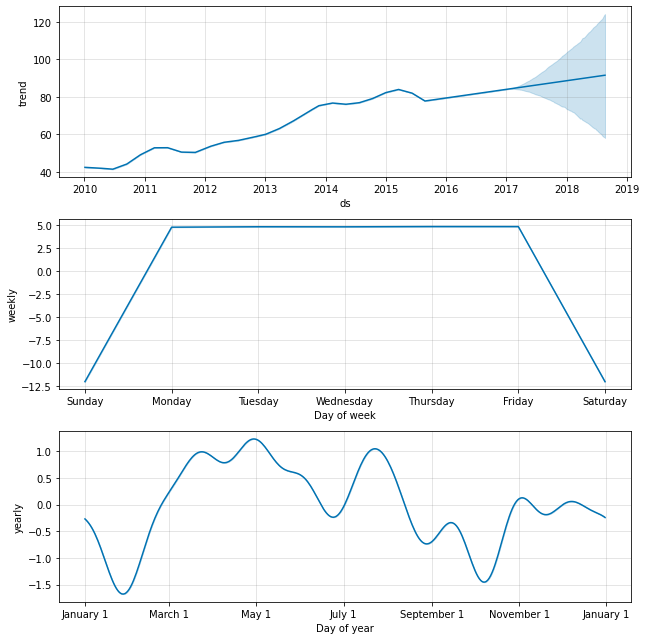

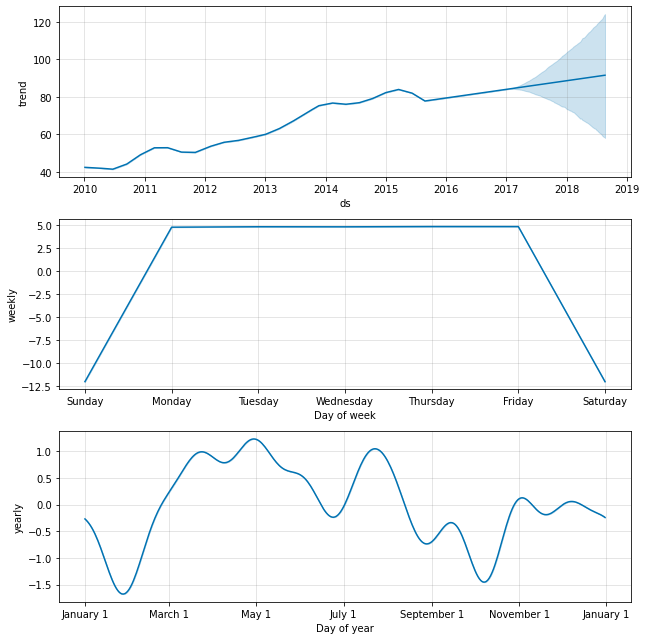

In [69]:
model.plot_components(tahmin)

In [72]:
df = pd.read_csv("hour.csv")

In [73]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [74]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [76]:
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [77]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [78]:
df = df.rename(columns= {'weathersit': 'weather',
                         'yr': 'year',
                         'mnth':'month',
                         'hr':'hour',
                         'hum':'humidity',
                         'cnt':'count'})
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [79]:
df = df.drop(columns=["instant","dteday","year"])

In [80]:
cols = ["season","month","hour","holiday","weekday","workingday","weather"]
for col in cols:
    df[col] = df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hour        17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

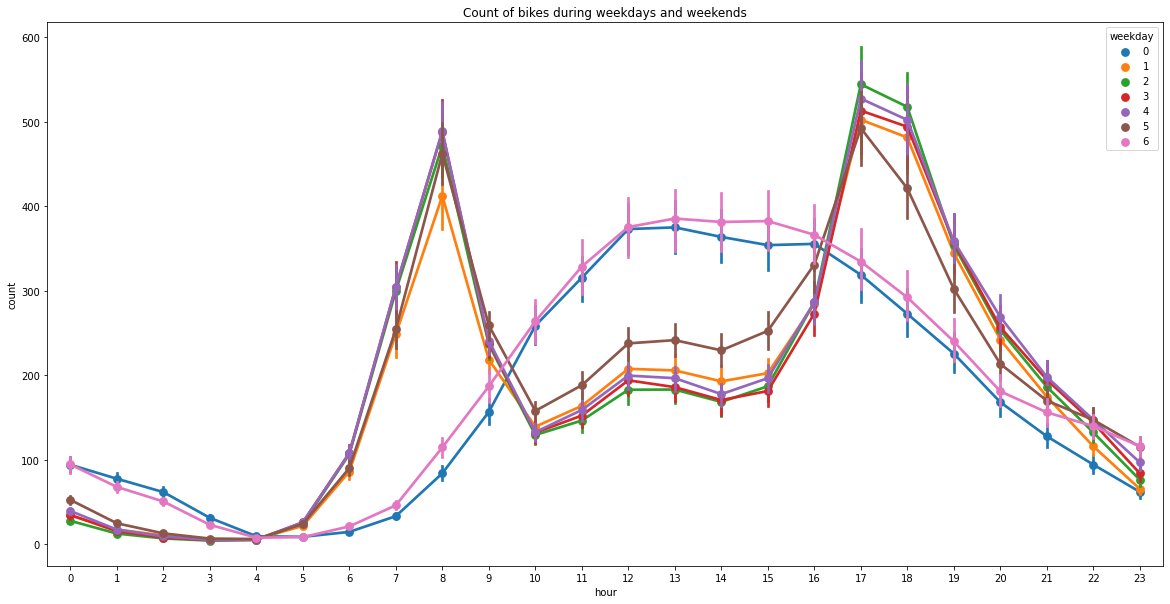

In [81]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data = df, x = "hour", y = "count", hue = "weekday", ax = ax)
ax.set(title = "Count of bikes during weekdays and weekends")

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: unregistered users')]

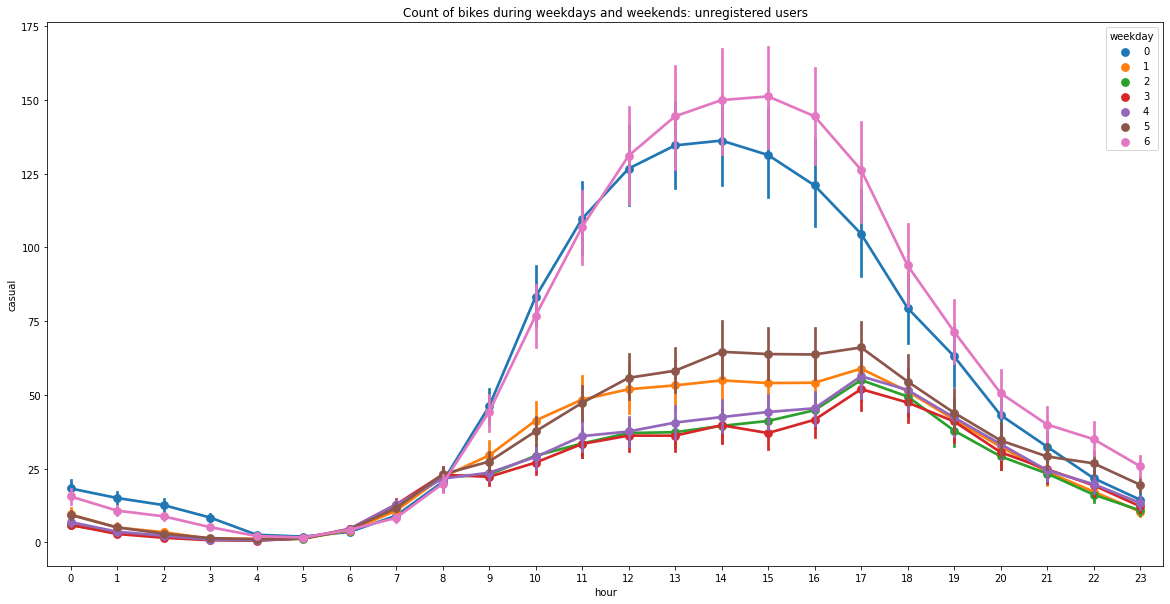

In [82]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data = df, x = "hour", y = "casual", hue = "weekday", ax = ax)
ax.set(title = "Count of bikes during weekdays and weekends: unregistered users")

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends: registered users')]

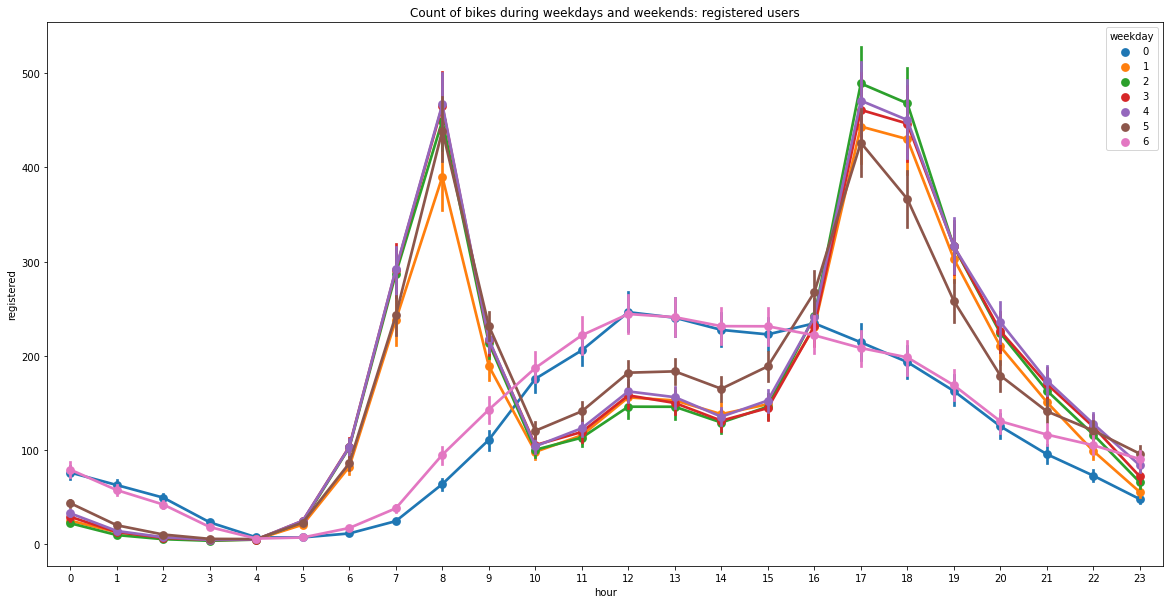

In [83]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data = df, x = "hour", y = "registered", hue = "weekday", ax = ax)
ax.set(title = "Count of bikes during weekdays and weekends: registered users")

[Text(0.5, 1.0, 'Count of bikes during different weathers')]

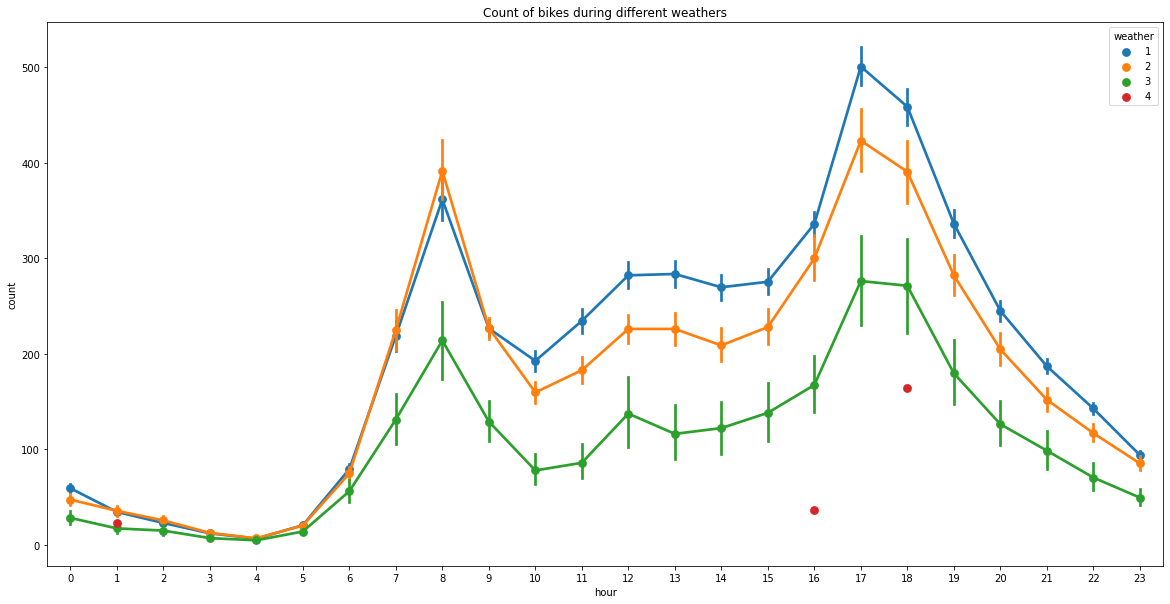

In [84]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data = df, x = "hour", y = "count", hue = "weather", ax = ax)
ax.set(title = "Count of bikes during different weathers")

[Text(0.5, 1.0, 'Count of bikes during different seasons')]

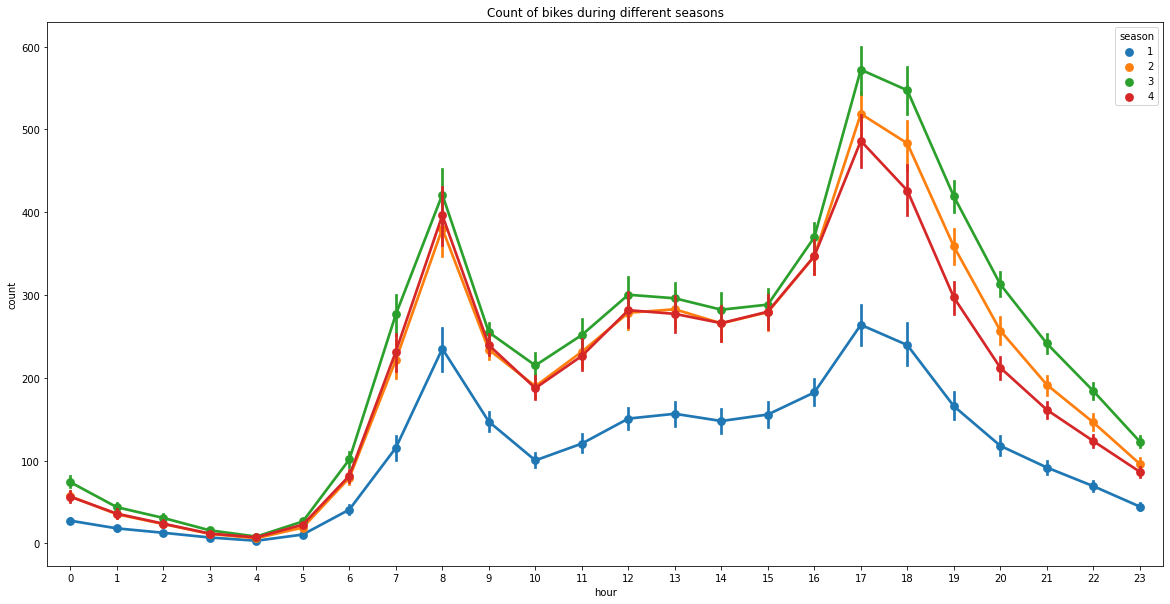

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data = df, x = "hour", y = "count", hue = "season", ax = ax)
ax.set(title = "Count of bikes during different seasons")

[Text(0.5, 1.0, 'Count of bikes during different months')]

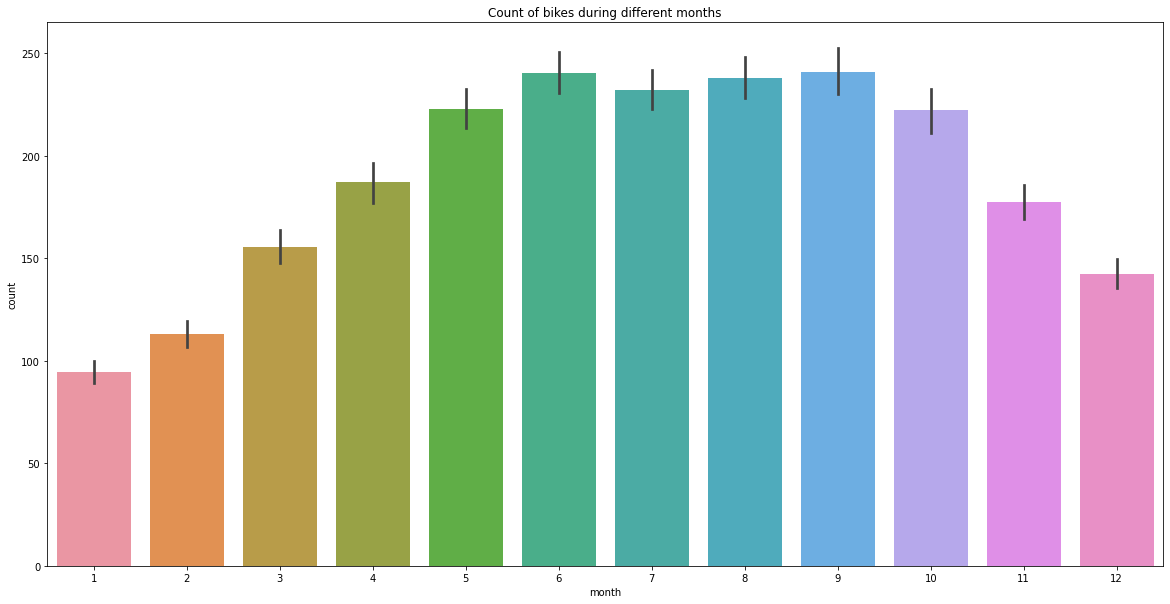

In [86]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data = df, x = "month", y = "count", ax = ax)
ax.set(title = "Count of bikes during different months")

[Text(0.5, 1.0, 'Count of bikes during different days')]

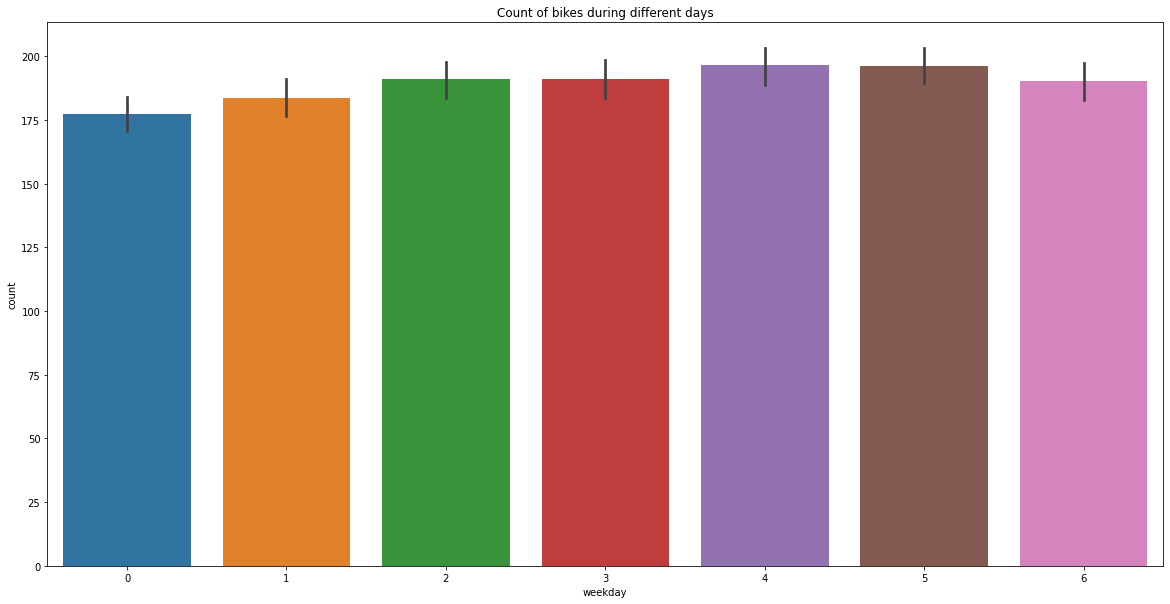

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data = df, x = "weekday", y = "count", ax = ax)
ax.set(title = "Count of bikes during different days")

[Text(0.5, 1.0, 'Relation between humidity and user')]

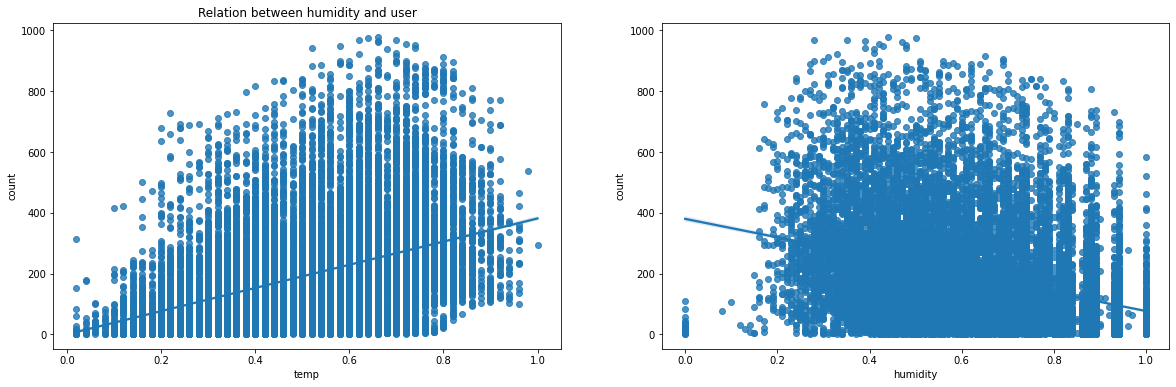

In [88]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (20,6))
sns.regplot(x = df['temp'], y= df['count'], ax = ax1)
ax1.set(title = "relation between temperature and users")
sns.regplot(x = df['humidity'], y = df['count'], ax = ax2)
ax1.set(title="Relation between humidity and user")

[Text(0.5, 1.0, 'Theoritical quantiles')]

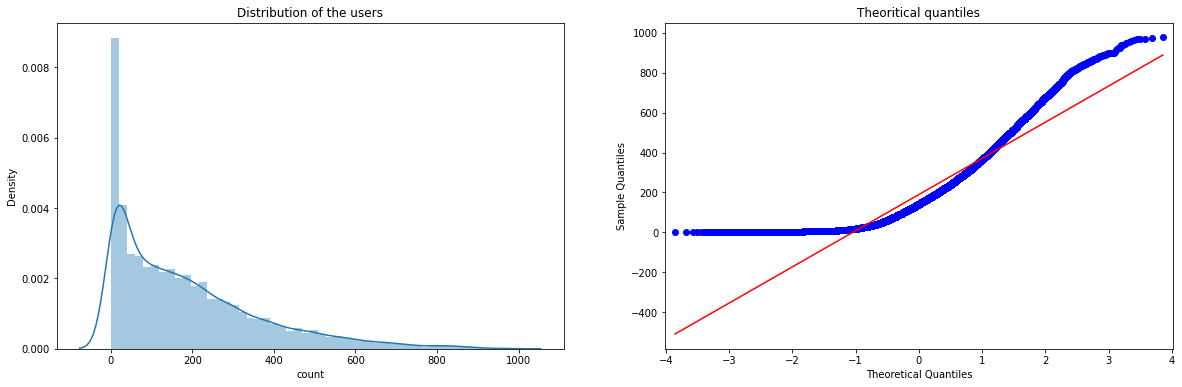

In [89]:
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (20,6))
sns.distplot(df['count'], ax = ax1)
ax1.set(title = "Distribution of the users")
qqplot(df['count'], ax = ax2, line = 's')
ax2.set(title="Theoritical quantiles")

In [90]:
df['count'] = np.log(df['count'])

[Text(0.5, 1.0, 'Theoritical quantiles')]

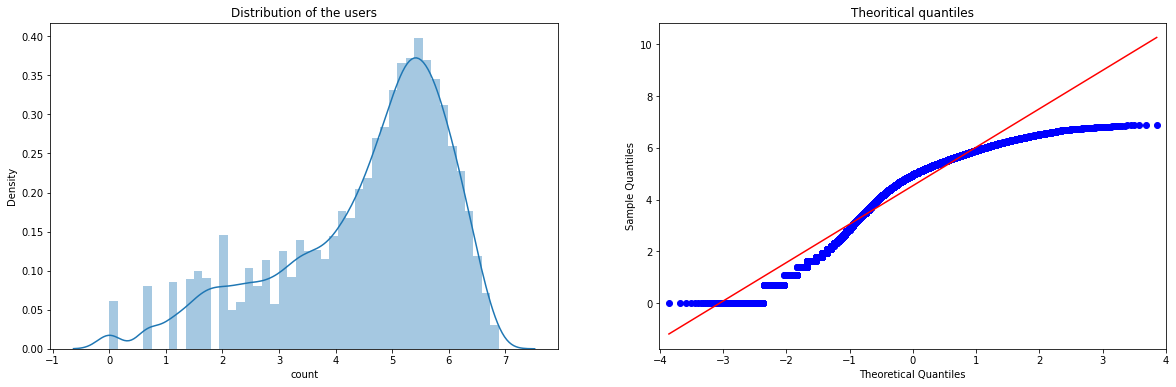

In [91]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (20,6))
sns.distplot(df['count'], ax = ax1)
ax1.set(title = "Distribution of the users")
qqplot(df['count'], ax = ax2, line = 's')
ax2.set(title="Theoritical quantiles")

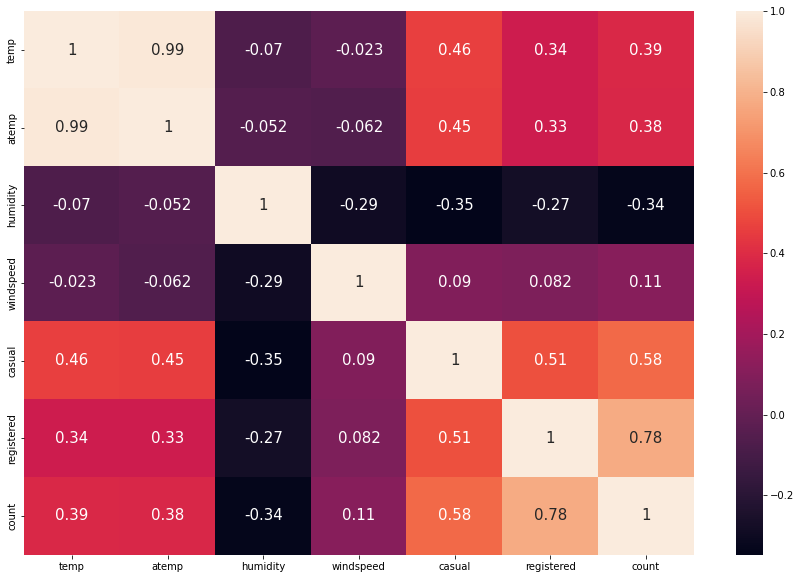

In [92]:
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, annot_kws={'size':15})

In [93]:
pd.get_dummies(df['season'], prefix = 'season', drop_first = True)

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17374,0,0,0
17375,0,0,0
17376,0,0,0
17377,0,0,0


In [94]:
df_oh = df

def one_hot_enconding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix = column, drop_first = True)], axis = 1)
    data = data.drop([column], axis = 1)
    return data

cols = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']

for col in cols:
    df_oh = one_hot_enconding(df_oh, col)
df_oh.head()

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [95]:
X = df_oh.drop(columns = ['atemp', 'windspeed', 'casual', 'registered', 'count'], axis = 1)
y = df_oh['count']

In [96]:
models = [LinearRegression(),
          Ridge(),
          ElasticNetCV(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          ExtraTreesRegressor(),
          GradientBoostingRegressor()]

In [97]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits = 5)
    pred = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = 'neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:', model)
    print('CV score:', abs(cv_score))

In [98]:
for model in models:
    train(model)

Model: LinearRegression()
CV score: 0.6313301520117317
Model: Ridge()
CV score: 0.6304079414191435
Model: ElasticNetCV()
CV score: 0.6252222784219456
Model: DecisionTreeRegressor()
CV score: 0.6058765159152737
Model: RandomForestRegressor()
CV score: 0.38930720241062244
Model: ExtraTreesRegressor()
CV score: 0.4037718418150913
Model: GradientBoostingRegressor()
CV score: 0.4714300371061174


In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [100]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

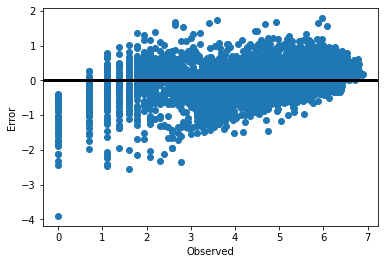

In [101]:
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw = 3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()

In [102]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.48636647433528607